In [1]:
from matplotlib import rcParams
from palettable import colorbrewer

dark2_colors = colorbrewer.get_map('Dark2', 'Qualitative', 7).mpl_colors

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 75
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

cmap = colorbrewer.get_map('RdYlGn', 'diverging', 9).mpl_colormap

In [2]:
from gsw.utilities import read_data

data = read_data("gsw_data_v3_0.npz")

In [3]:
import numpy as np


lon, lat, p = map(np.float_, (data.longs_ref, data.lats_ref, data.p_ref))

In [4]:
import numpy.ma as ma
from pandas import Panel

# deltaSA.
dsa = np.ma.masked_invalid(data.deltaSA_ref.transpose((2, 1, 0)))
dsa.data[dsa.mask] = 0

# SAAR (Absolute Salinity Ratio).
SAAR = np.ma.masked_invalid(data.SAAR_ref.transpose((2, 1, 0)))
SAAR.data[SAAR.mask] = 0

dsa = Panel(dsa, items=lon, major_axis=lat, minor_axis=p)
SAAR = Panel(SAAR, items=lon, major_axis=lat, minor_axis=p)

Absolute Salinity anomaly $\delta_{\text{SA}}$ at p $\sim$ 2000 dbar.

In [5]:
deltaSA = dsa.minor_xs(2025).values

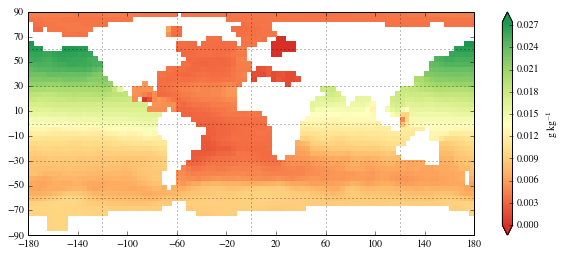

In [6]:
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection=ccrs.PlateCarree()))

cs = ax.pcolormesh(lon, lat, deltaSA, transform=ccrs.PlateCarree(),
                   cmap=cmap, zorder=0, clim=(0, 0.03))
cbar = fig.colorbar(cs, orientation='vertical', shrink=0.5, extend='both')
cbar.ax.set_ylabel(r"g kg$^{-1}$")
dx, dy = 40, 20
ax.set_xticks(range(-180, 180 + dx, dx))
ax.set_yticks(range(-90, 90 + dy, dy))
gl = ax.gridlines()

In [7]:
import os


fname = "delta_SA.png"
fig.savefig(fname, transparent=True)
_ = os.system('convert -trim %s %s' % (fname, fname))